# Neural Networks - Exercises

## EXERCISE 1

A very small NN has an input layer with 2 nodes and an output layer with 1 node. The are no hidden nodes. Calculate the feedforward pass if the input is [1, 1] the weights are [0.3, -0.1] and the bias is -0.7. The activation function used by the output layer is `sigmoid`. Use numpy arrays and the python `math` module to calculate the output the integration and activation function of the output node. Which of the 2 inputs has the biggest influence one the output?

In [3]:
import numpy as np
import math

input = np.array([1, 1])
weights = np.array([0.3, -0.1])
bias = -0.7

#integratie berekenen
integration = np.sum(input * weights) + bias

#activation = sigmoid
activation = 1 / (1 + math.exp(-integration))

print(integration, activation)

-0.5 0.3775406687981454


## EXERCISE 2

The goal is to predict the quality class of wine, based on features that come from a chemical analysis of the wine.

In [4]:
import numpy as np
from sklearn.datasets import load_wine
wine_x = load_wine().data
wine_y = load_wine().target
load_wine().DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

### 1. Data preparation

a. Print the shapes of wine_x and wine_y. How many wines do we have? How many featues do we have? Check whether there NaN values. How many quality classes do we have?

In [5]:
# shapes
print(wine_x.shape)
print(wine_y.shape)

#170 wijnen en 13 kenmerken per wijn

(178, 13)
(178,)


In [6]:
# nan
np.isnan(wine_x).sum()

0

In [7]:
# classes
np.unique(wine_y)

array([0, 1, 2])

b. Scale the input using min_max scaling (why do we do this?). Split the data in a train (85%) and test dataset (15%) (why do we do this?). Put the output in the right format. What is the name of the format?

In [11]:
# scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_x_norm = scaler.fit_transform(wine_x)

#we scalen omdat we alle features binnen hetzelfde bereik willen brengen dit is essentieel vor machine learning algoritmes

In [12]:
# split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine_x_norm, wine_y, test_size=0.15)

In [13]:
# convert output to right format
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print(y_train_onehot.shape)

(151, 3)


### 2. Define the model

Define the input layer with the right number of nodes. For the hidden layers, try out several options yourself. Define the output layer with the right number of nodes and a correct activation function. Print a model summary and compile the model with the Adam optimizer (choose the learning rate yourself), the correct loss function and a well choosen metric.

In [15]:
# define the model
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#input layer 784 nodes 
inputs = Input(shape=(13,))

#2 hidden layer
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

#output layer
outputs = Dense(3, activation='softmax')(x)

#model opbouwen
model = Model(inputs, outputs, name='WINE')

#summary printen
model.summary()

#compileren van het model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "WINE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,243 (40.01 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Train the model

Train the model with 10% of the training data taken for validation. Choose the number of epochs and the batch_size. Plot the loss function. Do we have overfitting?

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss:

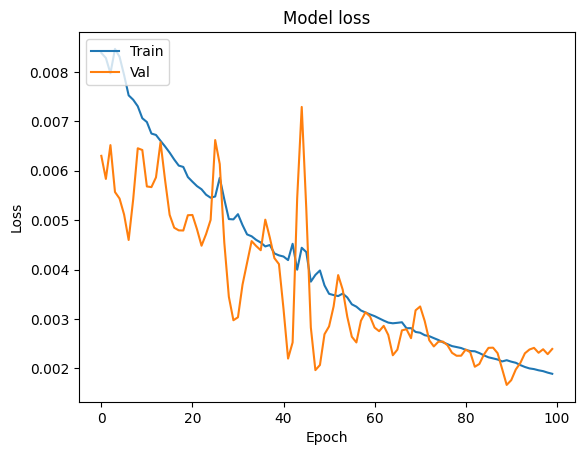

In [18]:
from plot_loss import plot_loss
# train the model
history = model.fit(
    x_train, # training input
    y_train_onehot, # training targets
    epochs=100,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

### 4. Evaluate the model

Evaluate the model with the test dataset (why thisone?). What is the accuracy of the model?

In [19]:
# evaluate the model
model.evaluate(x_test, y_test_onehot)

#accuracy van 96% procent is een mooie model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9630 - loss: 0.0531


[0.05312671139836311, 0.9629629850387573]

### 5. Use the model to predict

There is a new wine with the following characteristics for the features: 12, 6.5, 3, 25, 100, 2.5, 4, 0.5, 2, 8, 1, 3, 500. Predict the quality for this wine. What should be the shape of the predict parameter? Can we feed in the feature values right away? Which quality class is predicted? How sure is the prediction?

In [20]:
# predict
new_wine = [[12, 6.5, 3, 25, 100, 2.5, 4, 0.5, 2, 8, 1, 3, 500]]  # 2-dimensional!

new_wine_norm = scaler.transform(new_wine)  # no fit!
predicted_class = model.predict(new_wine_norm)
print(predicted_class)

#🔍 Wat betekent elk getal?
#Index	Kans (%)	Betekenis (voorbeeld)
#[0]	0.0568 = 5.7%	Kans op klasse 0
#[1]	0.9429 = 94.3% ✅	Kans op klasse 1 (voorspeld)
#[2]	0.00016 = 0.016%	Kans op klasse 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[5.6844503e-02 9.4299644e-01 1.5908216e-04]]


## EXERCISE 3

In this exercise we will predict the house price, based on some characteristics of the house.

In [21]:
from sklearn.datasets import fetch_california_housing
houses_x = fetch_california_housing().data
houses_y = fetch_california_housing().target
fetch_california_housing().DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

### 1. Data preparation

a. Print the shapes of houses_x and houses_y. How many houses do we have? How many featues do we have? Check whether there NaN values.

In [22]:
# shapes
print(houses_x.shape)
print(houses_y.shape)

#20640 huizen met acht kenmerken 
#20640 doelwaarden één waarde per rij --> Dit is later dan de dense!

(20640, 8)
(20640,)


In [23]:
# nan
np.isnan(houses_x).sum()

0

b. Scale the input using min_max scaling (why do we do this?). Split the data in a train (90%) and test dataset (10%) (why do we do this?).

In [24]:
# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
houses_x_norm = scaler.fit_transform(houses_x)

In [25]:
# split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(houses_x_norm,houses_y,test_size=0.1) 

### 2. Define the model

Define the input layer with the right number of nodes. For the hidden layers, try out several options yourself. Define the output layer with the right number of nodes and a correct activation function. Print a model summary and compile the model with the Adam optimizer (choose the learning rate yourself), the correct loss function and a well choosen metric. How many parameters (weights and biases) does your model have?

In [33]:
# define the model
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#input layer 784 nodes 
inputs = Input(shape=(8,))

#2 hidden layer
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

#output layer
outputs = Dense(1, activation='linear')(x)

#model opbouwen
model = Model(inputs, outputs, name='HOUSE')

#summary printen
model.summary()

#compileren van het model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error']
)

Model: "HOUSE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Train the model

Train the model with 10% of the training data taken for validation. Choose the number of epochs and the batch_size. Plot the loss function. Do we have overfitting?

Epoch 1/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 1.4864 - mean_absolute_percentage_error: 51.1490 - val_loss: 0.5943 - val_mean_absolute_percentage_error: 32.5100
Epoch 2/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.5522 - mean_absolute_percentage_error: 31.5678 - val_loss: 0.5398 - val_mean_absolute_percentage_error: 26.8402
Epoch 3/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.4965 - mean_absolute_percentage_error: 29.1731 - val_loss: 0.4897 - val_mean_absolute_percentage_error: 28.7009
Epoch 4/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.4800 - mean_absolute_percentage_error: 28.7936 - val_loss: 0.4800 - val_mean_absolute_percentage_error: 25.3372
Epoch 5/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.4564 - mean_absolute_percentage_error: 27.1233 - val_loss: 0.4596 - val_mean_absolute_percentage_error: 25.7489
Epoch 6/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 0.4544 - mean_absolute_percentage_error: 26.6190 - val_los

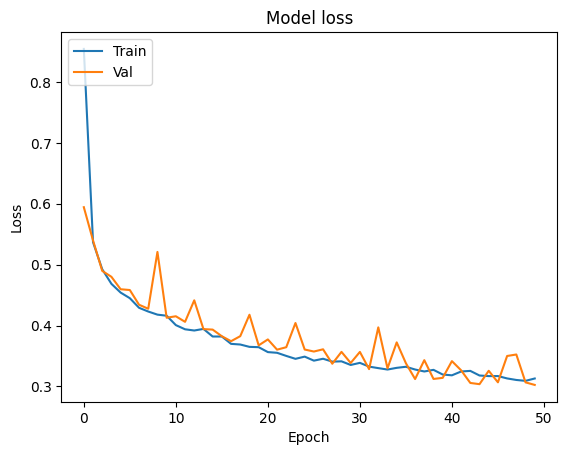

In [38]:
from plot_loss import plot_loss
# train the model
history = model.fit(
    x_train, # training input
    y_train, # training targets
    epochs=50,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

### 4. Evaluate the model

Evaluate the model with the test dataset (why thisone?). What is the accuracy of the model?

In [39]:
# evaluate
model.evaluate(x_test,y_test)

#📘 Hoe interpreteer je dit?
#📉 loss = 0.30: Hoe lager, hoe beter. Dit is de mean squared error. Een fout van 0.30 is oké als je data geschaald is (zoals bij MinMaxScaler).
#🎯 mean_absolute_percentage_error = 22.49: Gemiddeld zit je model er 22.5% naast. Dat is best redelijk voor een regressiemodel.

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.2850 - mean_absolute_percentage_error: 21.7656


[0.3037273585796356, 22.494895935058594]

### 5. Use the model to predict

There is a house on the market with the following values for the features: 3,30,5,1,1500,4,38,-125. Predict the price for this housee. What should be the shape of the predict parameter? Can we feed in the feature values right away? 

In [40]:
# predict
new_house = [[3,30,5,1,1500,4,38,-125]]  # 2-dimensional!
new_house_norm = scaler.transform(new_house)  # no fit!
predicted_price = model.predict(new_house_norm)
print(predicted_price)

#dit hieronder is het voorspelde waarde voor de nieuwe huis


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[5.9091935]]


In [41]:
#als ik de niet geschaalde resultaat wil hebben:
real_price = y_scaler.inverse_transform(predicted_price)

NameError: name 'y_scaler' is not defined